## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler,RobustScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import auc
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report
from tabulate import tabulate
import warnings


pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')

## 1. Load Dataset

Information Columns :

1. HeartDisease : This column information about whether someone has heart disease or not.

2. BMI : Stands for Body Mass Index, which measures the proportion of weight to height for an individual.

3. Smoking : This column may store information about whether someone smokes or not.

4. AlcoholDrinking : Information about whether someone consumes alcoholic beverages or not.

5. Stroke : Could contain information about whether someone has had a stroke or not.

6. PhysicalHealth : This column might describe someone's physical health condition.

7. MentalHealth : Indicates someone's mental health condition.

8. DiffWalking : Likely stores information about whether someone has difficulty walking or not.

9. Sex : Indicates someone's gender.

10. AgeCategory : Groups someone's age into specific categories.

11. Race : Stores information about someone's race or ethnicity.

12. Diabetic : Information about whether someone has diabetes or not.

13. PhysicalActivity : Indicates how active someone is in physical activities.

14. GenHealth: Describes someone's overall health condition.

15. SleepTime : Someone's sleep time, which could be an indicator of sleep health.

16. Asthma : Information about whether someone has asthma or not.

17. KidneyDisease : Could contain information about whether someone has kidney disease or not.

18. SkinCancer : Information about whether someone has skin cancer or not.

Dataset yang digunakan yaitu dataset di download situs resmi kaggle adapun urlnya sebagai berikut : https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease

In [2]:
df = pd.read_csv('dataset/2020/heart_2020_cleaned.csv')
print(f'\nUkuran data set memiliki {df.shape[0]} Baris dan {df.shape[1]} Kolom.')
df.head()


Ukuran data set memiliki 319795 Baris dan 18 Kolom.


,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


### 1.1 Cheak Missing Value

In [3]:
df.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

<Axes: >

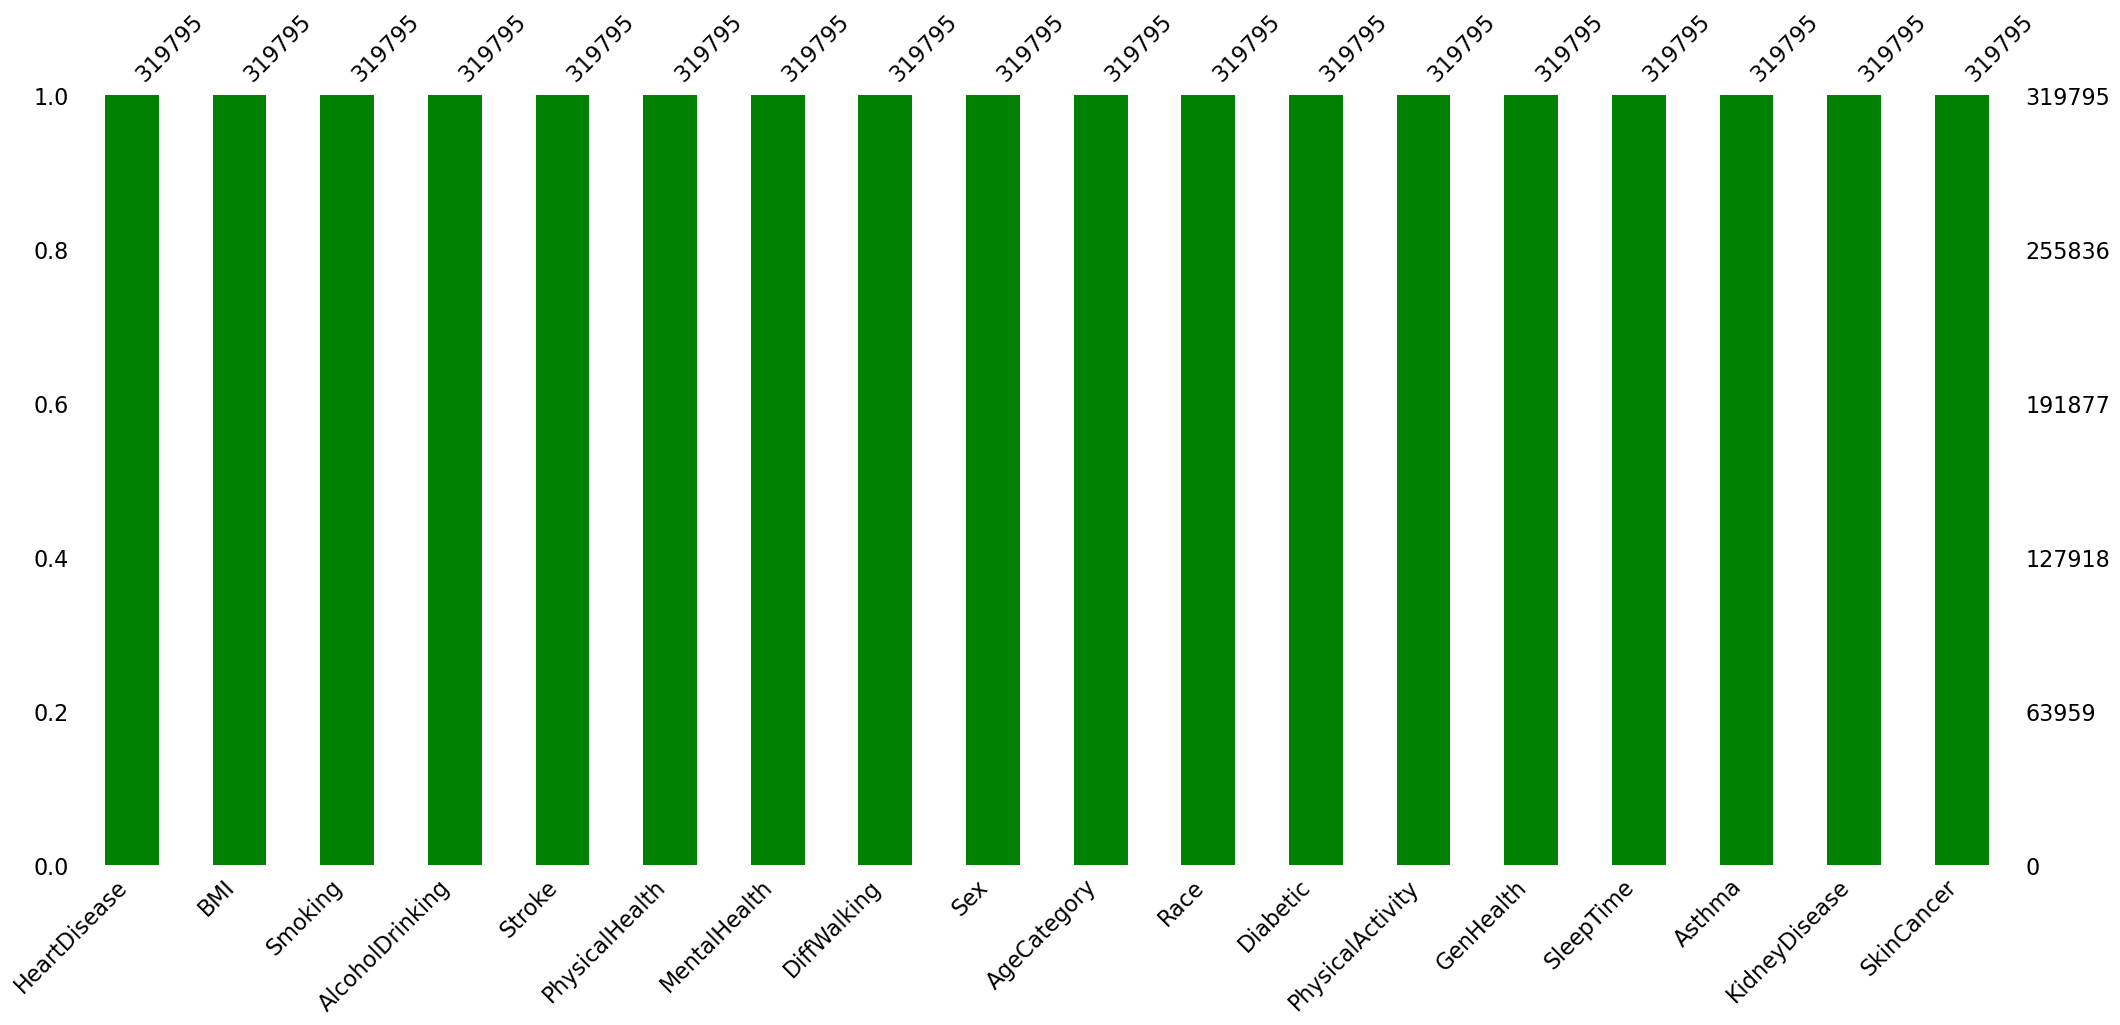

In [4]:
msno.bar(df, color='g')

Pada saat pengecekan nilai NAn tidak terdapat kolom yang memiliki nilai yang kosong atau NAn.

### 1.2 Cheaking Summary dataset

In [5]:
print('\nSummary of the data with numerical columns :')
df.describe()


Summary of the data with numerical columns :


,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


### 1.3 Cheaking Duplicated

In [6]:
df.duplicated().sum()

18078

In [7]:
df.drop_duplicates(inplace=True)

### 1.4 Cheacking Info Columns

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 301717 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      301717 non-null  object 
 1   BMI               301717 non-null  float64
 2   Smoking           301717 non-null  object 
 3   AlcoholDrinking   301717 non-null  object 
 4   Stroke            301717 non-null  object 
 5   PhysicalHealth    301717 non-null  float64
 6   MentalHealth      301717 non-null  float64
 7   DiffWalking       301717 non-null  object 
 8   Sex               301717 non-null  object 
 9   AgeCategory       301717 non-null  object 
 10  Race              301717 non-null  object 
 11  Diabetic          301717 non-null  object 
 12  PhysicalActivity  301717 non-null  object 
 13  GenHealth         301717 non-null  object 
 14  SleepTime         301717 non-null  float64
 15  Asthma            301717 non-null  object 
 16  KidneyDisease     301717 

In [9]:
for column in df.columns:
    len_distance_clomuns = len(df[column].unique())
    print(f'{column} : {len_distance_clomuns} distance column')

HeartDisease : 2 distance column
BMI : 3604 distance column
Smoking : 2 distance column
AlcoholDrinking : 2 distance column
Stroke : 2 distance column
PhysicalHealth : 31 distance column
MentalHealth : 31 distance column
DiffWalking : 2 distance column
Sex : 2 distance column
AgeCategory : 13 distance column
Race : 6 distance column
Diabetic : 4 distance column
PhysicalActivity : 2 distance column
GenHealth : 5 distance column
SleepTime : 24 distance column
Asthma : 2 distance column
KidneyDisease : 2 distance column
SkinCancer : 2 distance column


In [10]:
df.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

## 2. EDA 

In [11]:
numerical_type = df.select_dtypes(include=['number']).columns.to_list()
numerical_type

['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']

In [12]:
categorical_type = df.select_dtypes(include=['object', 'category']).columns.to_list()
categorical_type

['HeartDisease',
 'Smoking',
 'AlcoholDrinking',
 'Stroke',
 'DiffWalking',
 'Sex',
 'AgeCategory',
 'Race',
 'Diabetic',
 'PhysicalActivity',
 'GenHealth',
 'Asthma',
 'KidneyDisease',
 'SkinCancer']

### 2.1 Univariate Analysis:

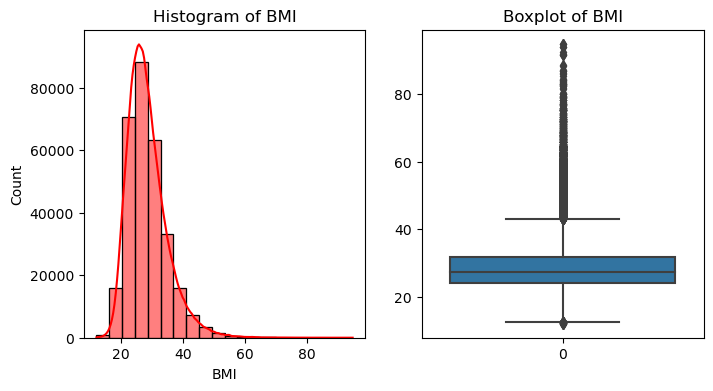

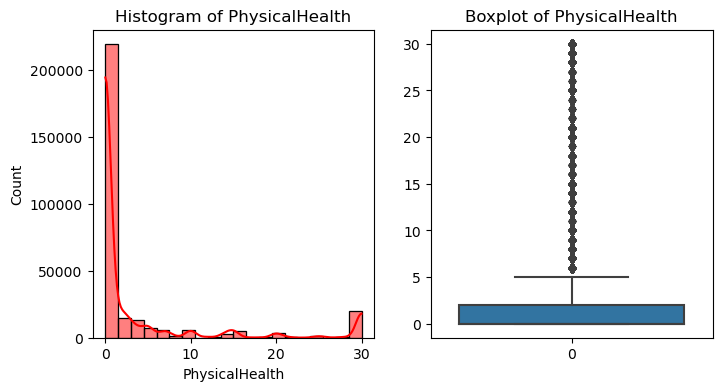

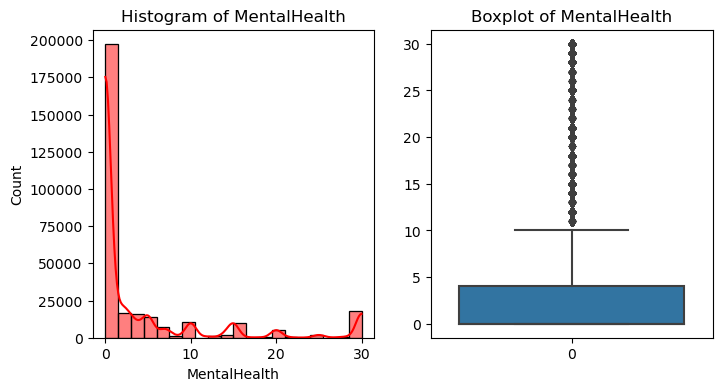

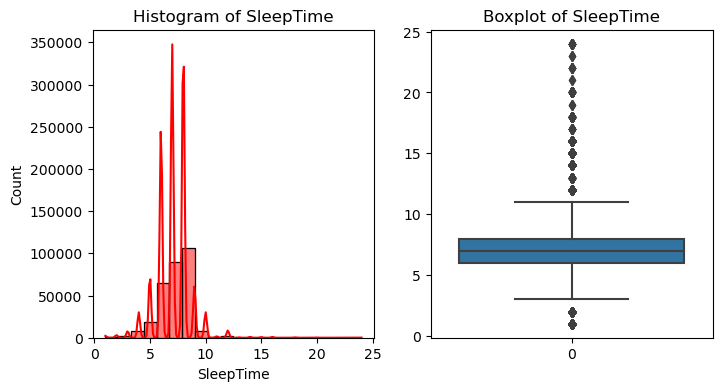

In [13]:
def univariate_analyst(col):
    fig, ax = plt.subplots(1, 2 , figsize=(8,4))
    sns.histplot(data=df[col], kde=True, bins=20, color='r', ax=ax[0])
    ax[0].set_title(f'Histogram of {col}')
    
    sns.boxplot(data=df[col], ax=ax[1])
    ax[1].set_title(f'Boxplot of {col}')

for col in numerical_type:
    univariate_analyst(col)

In [14]:
mypal = ['#FF5733', '#33FF57', '#3373FF', '#FF33F3', '#B4FFE4']

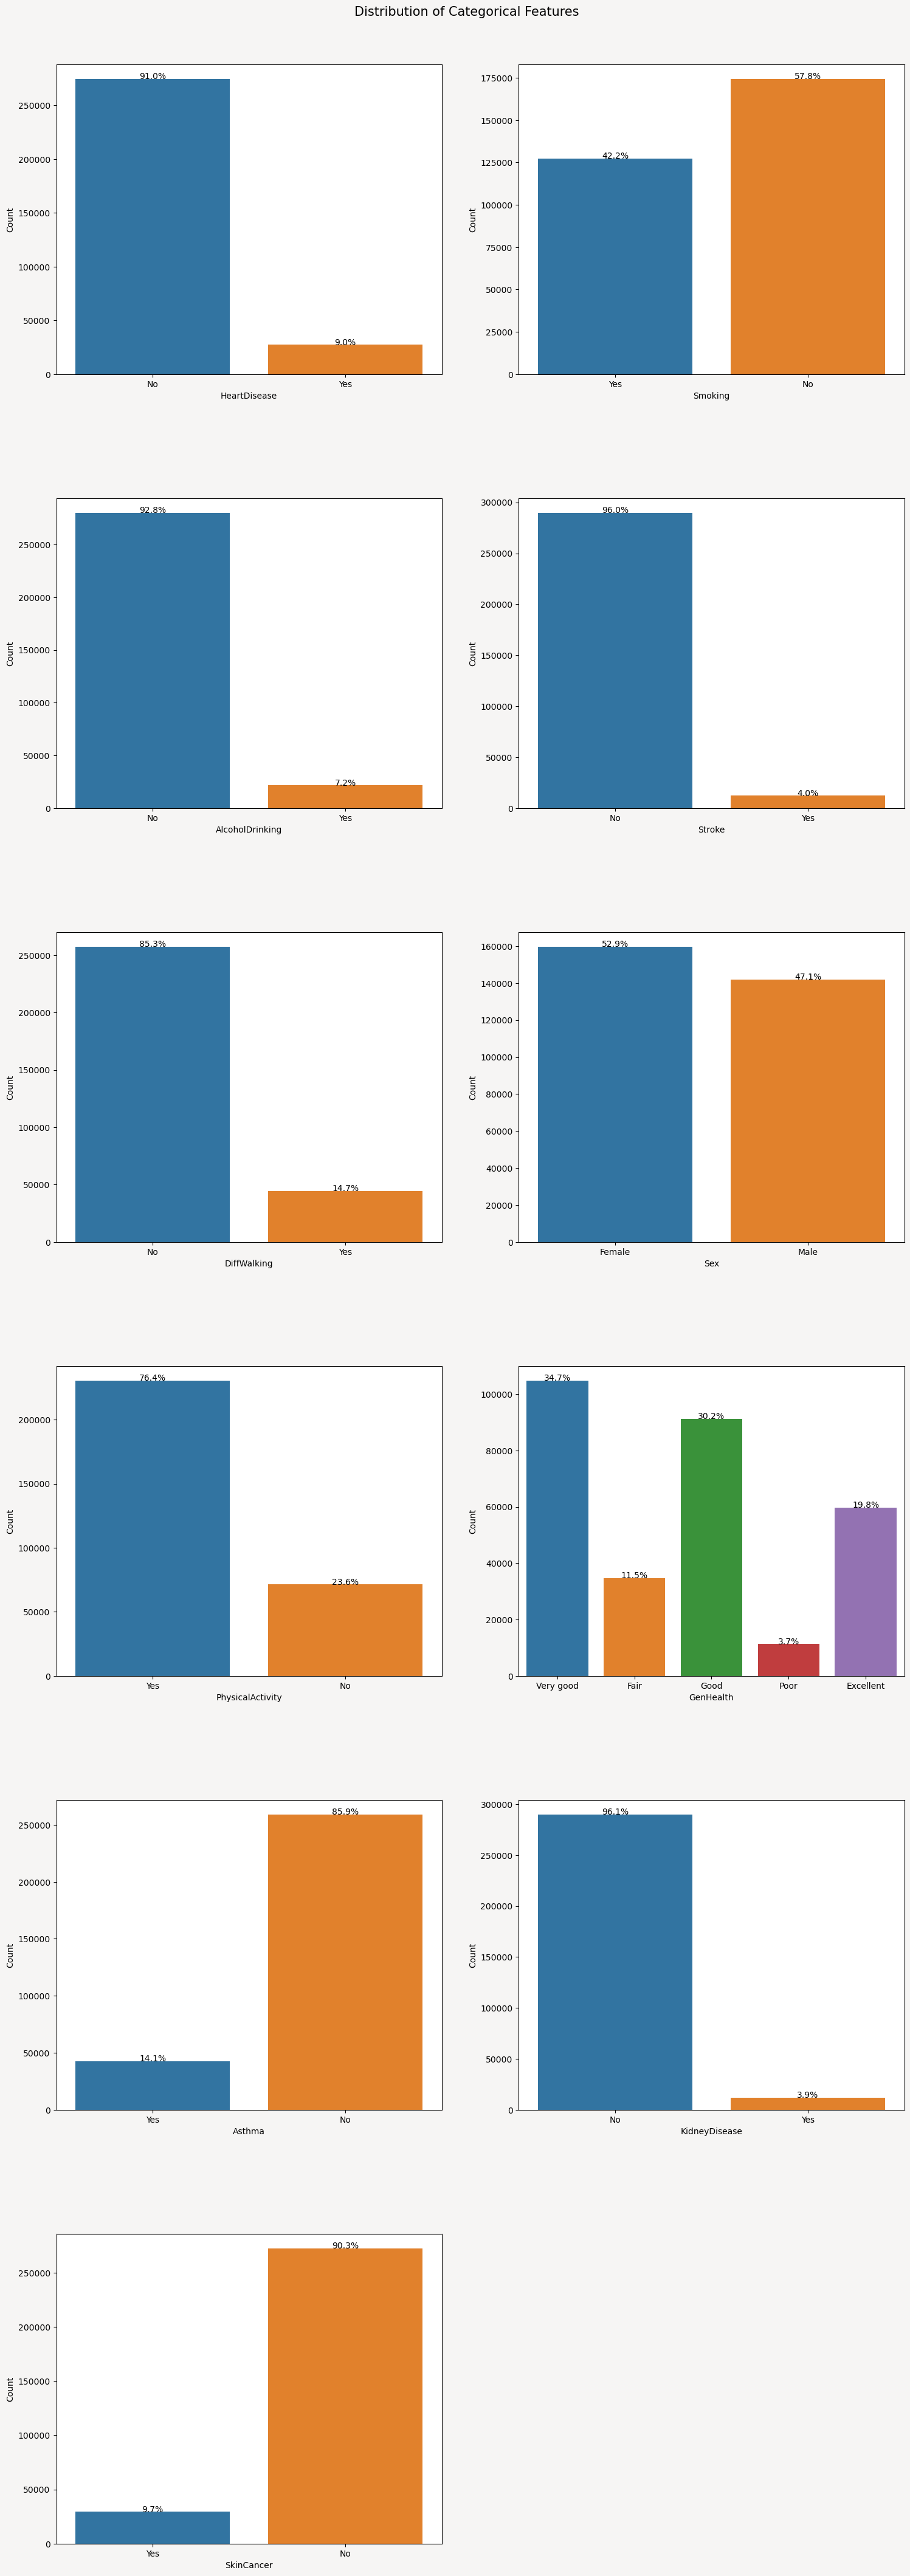

In [15]:
cat_feats = ['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex',
             'PhysicalActivity', 'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer']

L = len(cat_feats)
n_col = 2
n_row = int(np.ceil(L/ n_col))

fig, axs = plt.subplots(n_row , n_col, figsize=(18, 8 * n_row), facecolor='#F6F5F4')
fig.subplots_adjust(top=0.96, hspace=0.4, wspace =0.2)

i = 0
for col in cat_feats:
    ax = axs[i // n_col , i % n_col]
    sns.countplot(data=df, x = col, ax= ax)
    ax.set_xlabel(col)
    ax.set_ylabel('Count')
    total = float(len(df))
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2., height + 3, '{:.1f}%'.format((height / total) * 100), ha="center")

    i += 1
    
if L % 2 != 0:
    axs[-1, -1].axis('off')

plt.suptitle('Distribution of Categorical Features', fontsize=15)
plt.show()


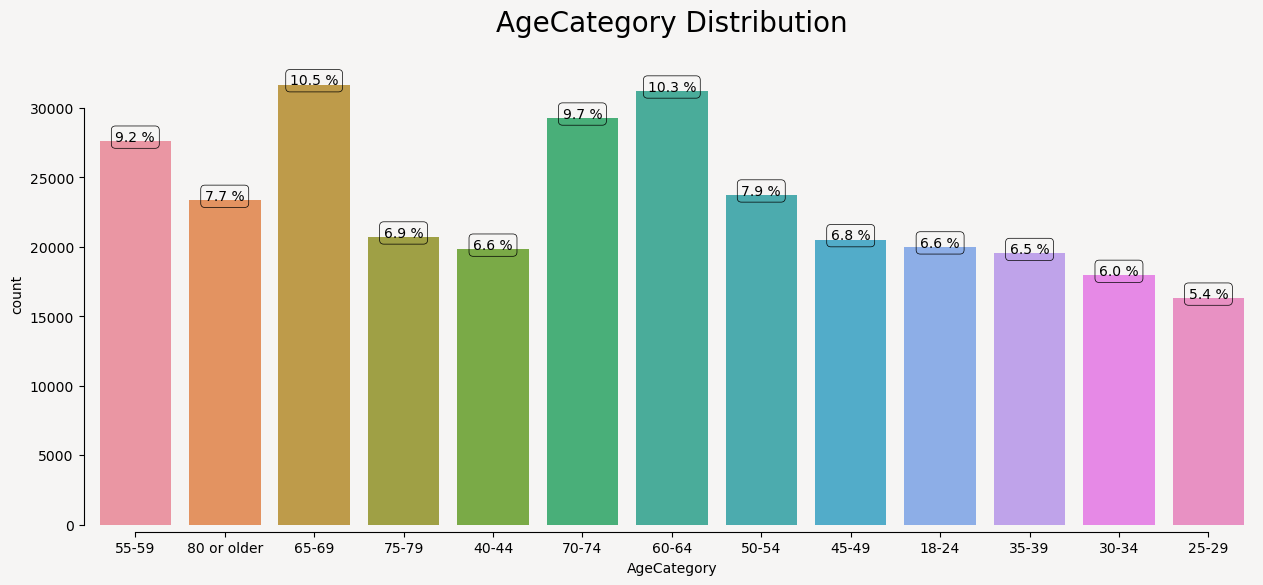

In [16]:
plt.figure(figsize=(15, 6),facecolor='#F6F5F4')
total = float(len(df))
ax = sns.countplot(x=df['AgeCategory'])
ax.set_facecolor('#F6F5F4')

for p in ax.patches:
    
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,height + 3,'{:1.1f} %'.format((height/total)*100), ha="center",
           bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.5))

ax.set_title('AgeCategory Distribution', fontsize=20, y=1.05)
sns.despine(right=True)
sns.despine(offset=5, trim=True)

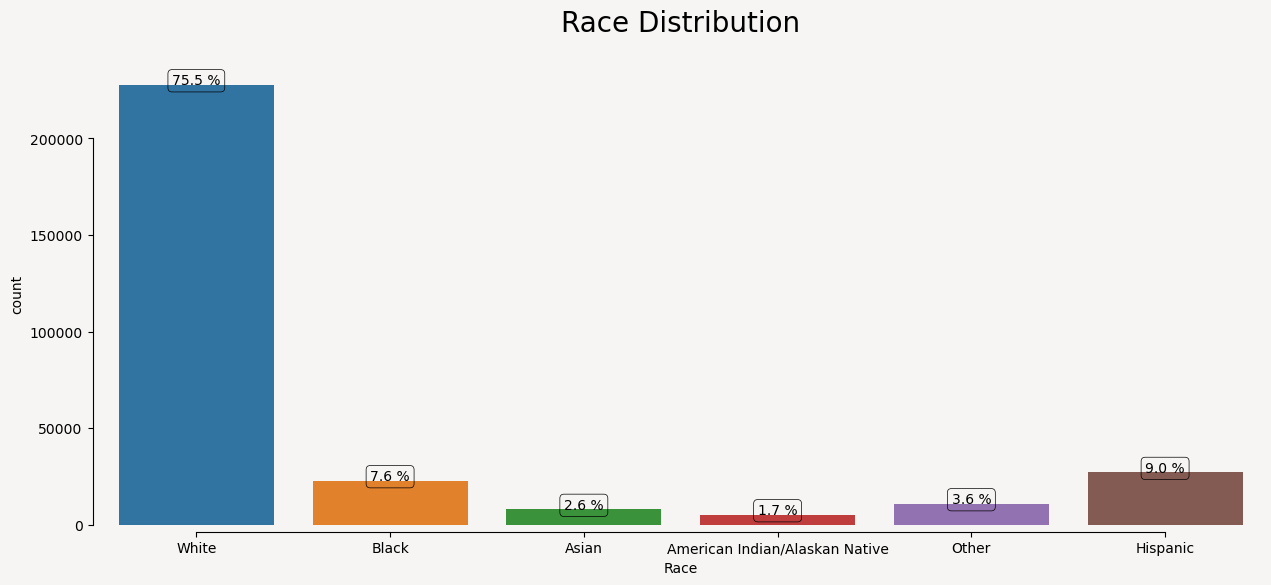

In [17]:
plt.figure(figsize=(15, 6),facecolor='#F6F5F4')
total = float(len(df))
ax = sns.countplot(x=df['Race'])
ax.set_facecolor('#F6F5F4')

for p in ax.patches:
    
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,height + 3,'{:1.1f} %'.format((height/total)*100), ha="center",
           bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.5))

ax.set_title('Race Distribution', fontsize=20, y=1.05)
sns.despine(right=True)
sns.despine(offset=5, trim=True)

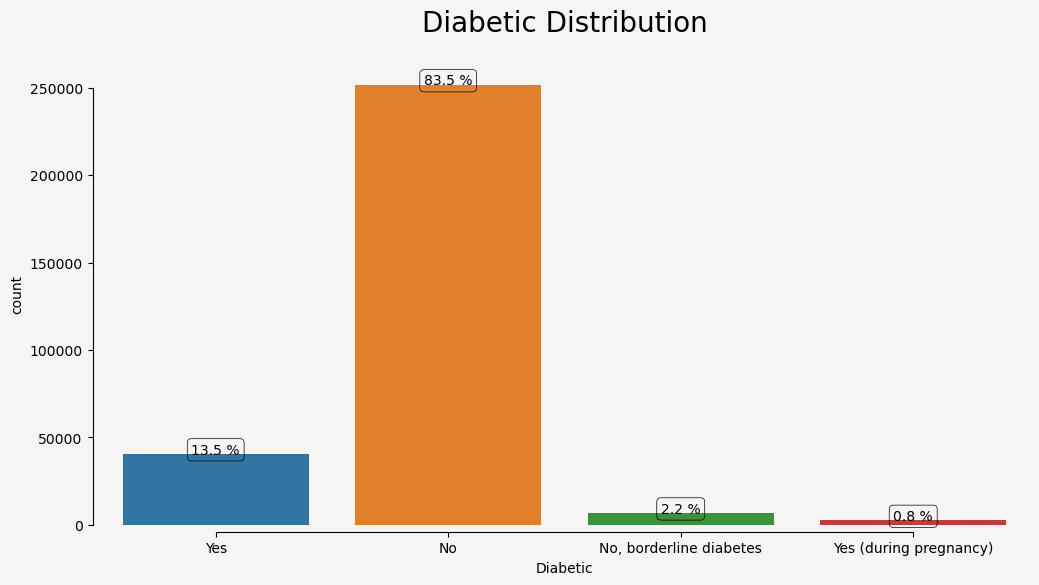

In [18]:
plt.figure(figsize=(12, 6),facecolor='#F6F5F4')
total = float(len(df))
ax = sns.countplot(x=df['Diabetic'])
ax.set_facecolor('#F6F5F4')

for p in ax.patches:
    
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,height + 3,'{:1.1f} %'.format((height/total)*100), ha="center",
           bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.5))

ax.set_title('Diabetic Distribution', fontsize=20, y=1.05)
sns.despine(right=True)
sns.despine(offset=5, trim=True)

### 2.2 Bivariate Aanlysis: 

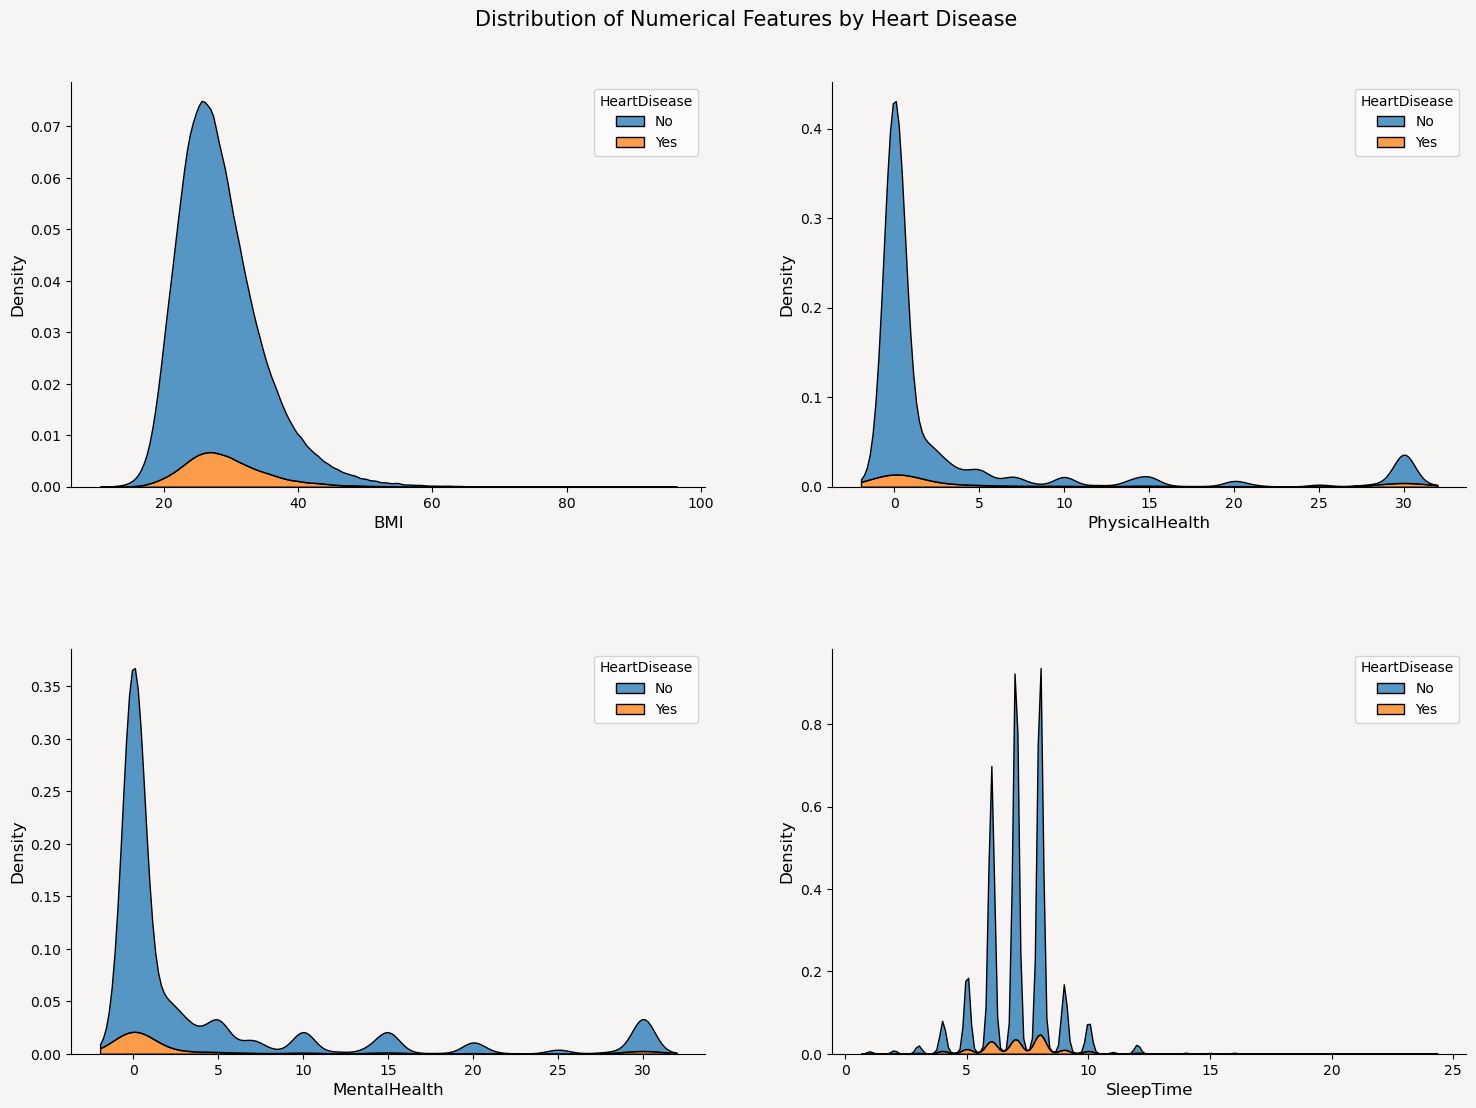

In [19]:
num_feats = ['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']

L = len(num_feats)
ncol = 2
nrow = int(np.ceil(L / ncol))

fig, ax = plt.subplots(nrow, ncol, figsize=(18, 6 * nrow), facecolor='#F6F5F4')
fig.subplots_adjust(top=0.92, hspace=0.4, wspace=0.2) 

i = 0
for col in num_feats:
    plt.subplot(nrow, ncol, i + 1, facecolor='#F6F5F4')

    sns.kdeplot(data=df, x=col, hue="HeartDisease", multiple="stack")
    plt.xlabel(col, fontsize=12)
    plt.ylabel("Density", fontsize=12)
    sns.despine(right=True)
    sns.despine(offset=0, trim=False)

    i += 1

plt.suptitle('Distribution of Numerical Features by Heart Disease', fontsize=15)
plt.show()

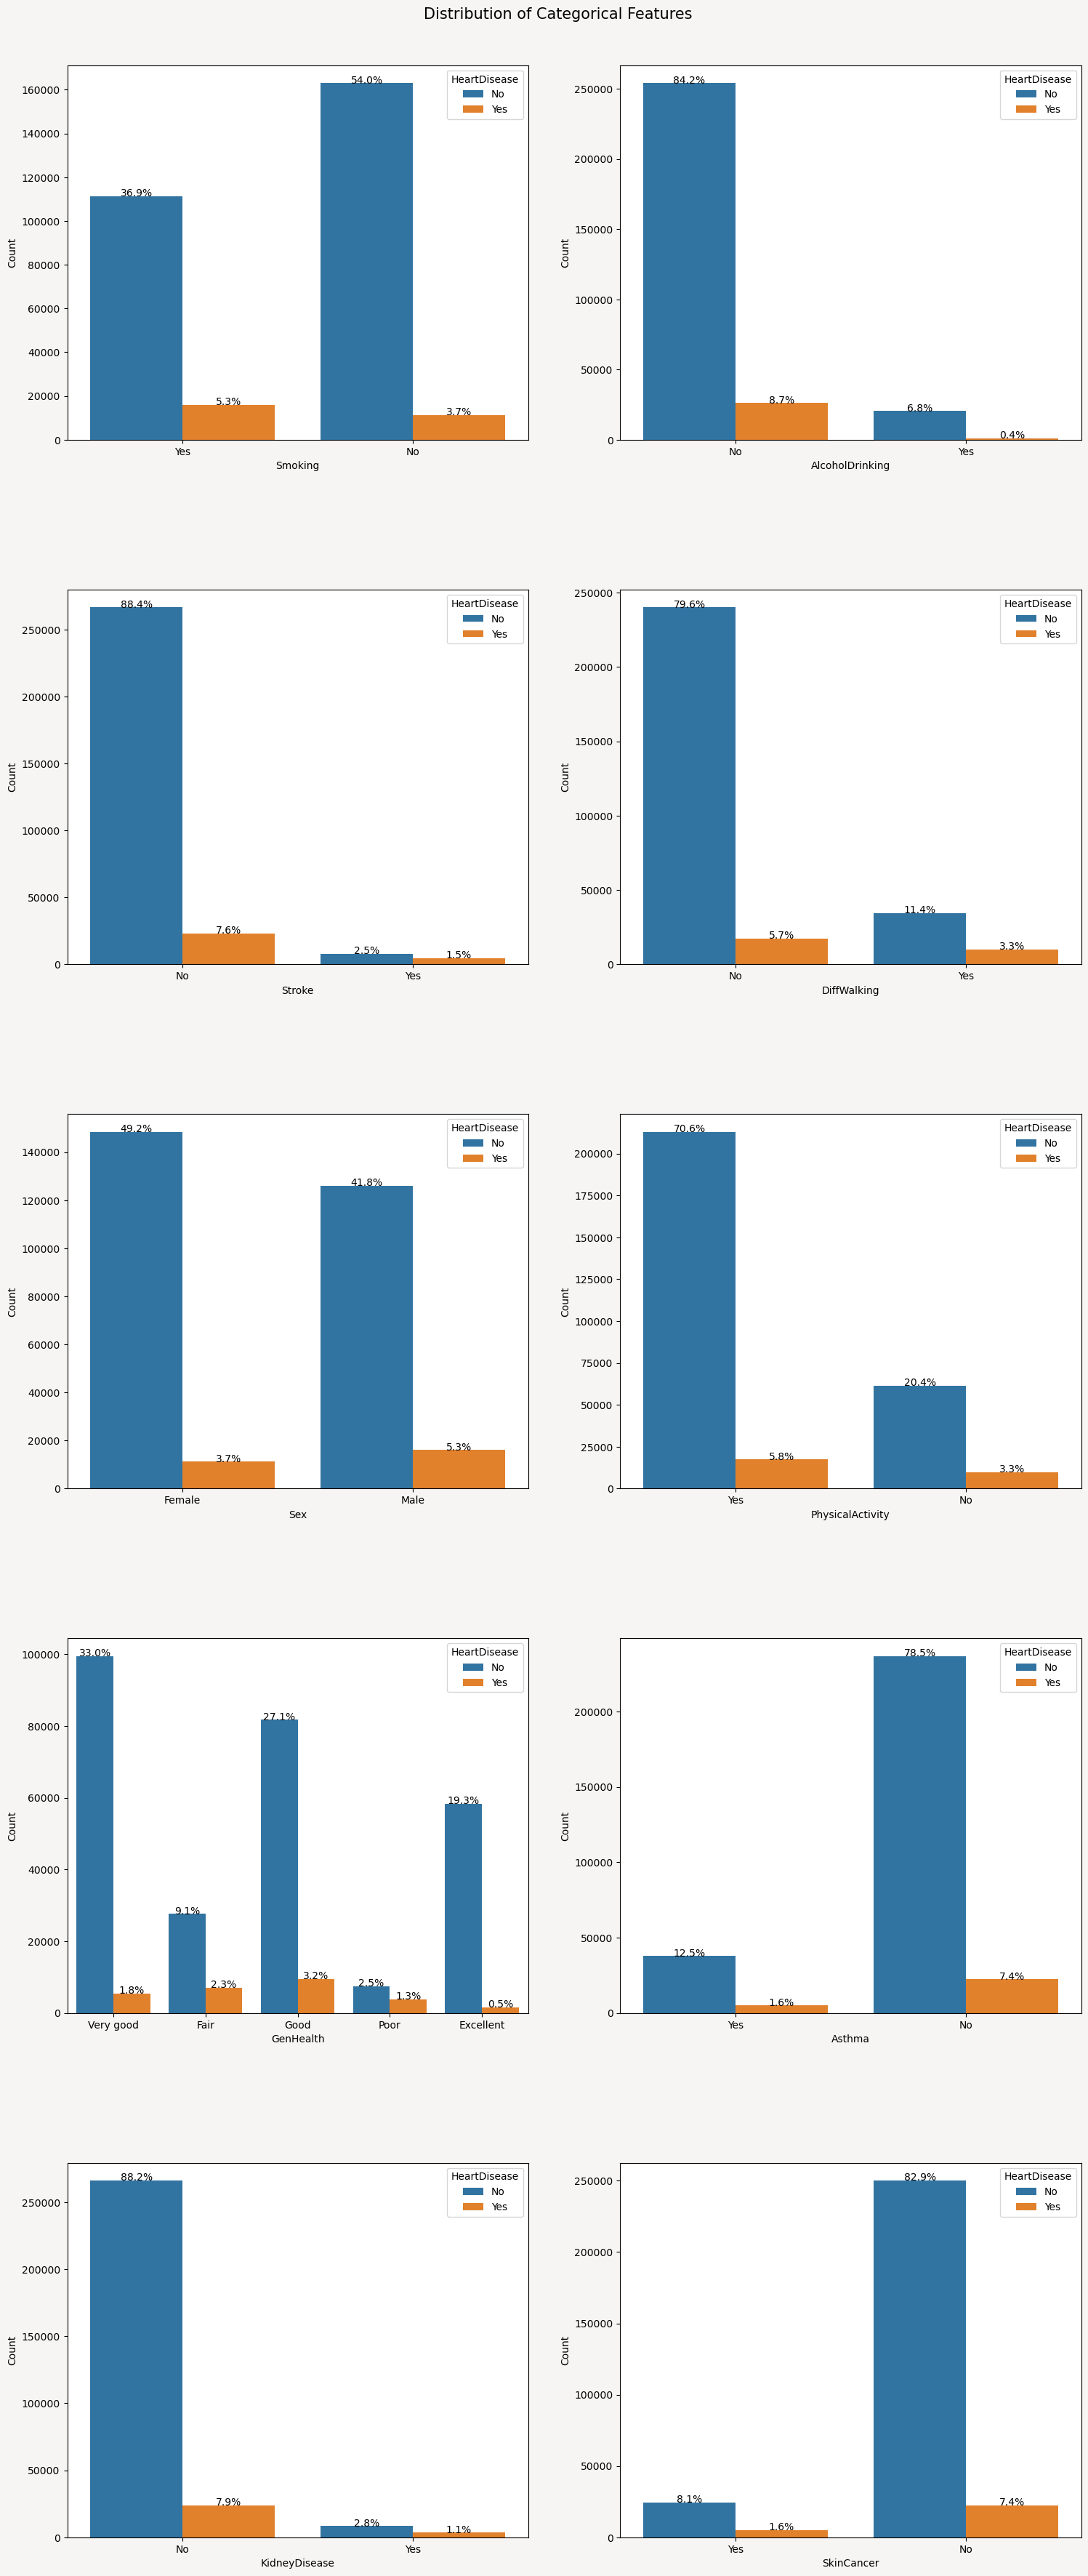

In [20]:
cat_feats = ['Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex',
             'PhysicalActivity', 'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer']

L = len(cat_feats)
n_col = 2
n_row = int(np.ceil(L/ n_col))

fig, axs = plt.subplots(n_row , n_col, figsize=(18, 8 * n_row), facecolor='#F6F5F4')
fig.subplots_adjust(top=0.96, hspace=0.4, wspace =0.2)

i = 0
for col in cat_feats:
    ax = axs[i // n_col , i % n_col]
    sns.countplot(data=df, x = col, ax= ax, hue='HeartDisease')
    ax.set_xlabel(col)
    ax.set_ylabel('Count')
    total = float(len(df))
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2., height + 3, '{:.1f}%'.format((height / total) * 100), ha="center")

    i += 1
    
if L % 2 != 0:
    axs[-1, -1].axis('off')

plt.suptitle('Distribution of Categorical Features', fontsize=15)
plt.show()


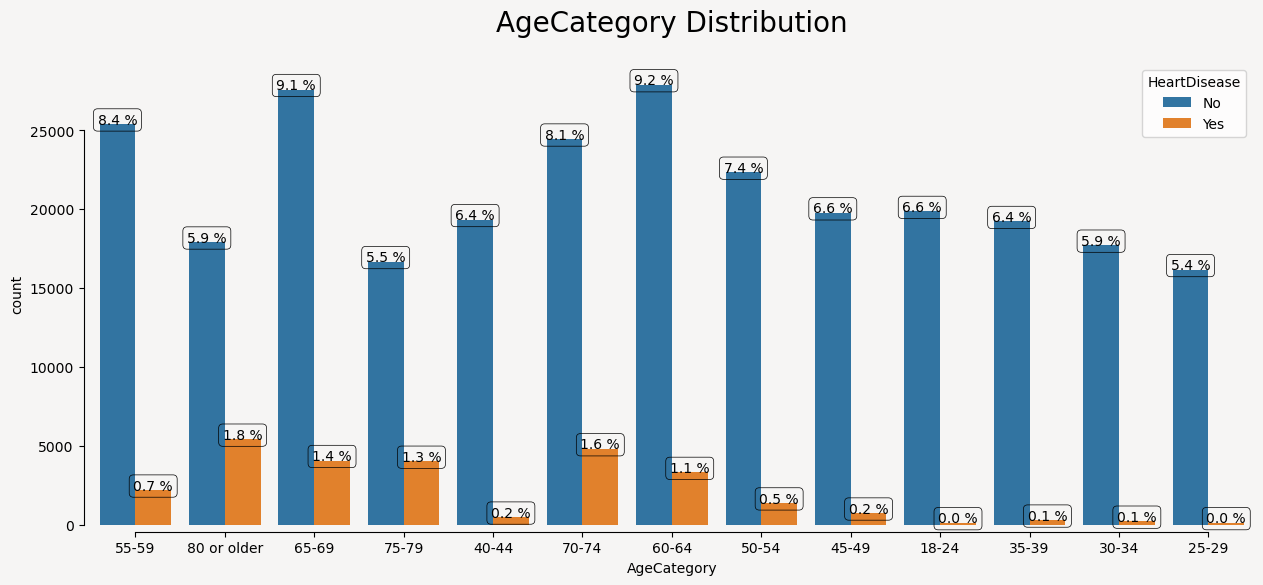

In [21]:
plt.figure(figsize=(15, 6),facecolor='#F6F5F4')
total = float(len(df))
ax = sns.countplot(x=df['AgeCategory'], hue='HeartDisease', data=df)
ax.set_facecolor('#F6F5F4')

for p in ax.patches:
    
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,height + 3,'{:1.1f} %'.format((height/total)*100), ha="center",
           bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.5))

ax.set_title('AgeCategory Distribution', fontsize=20, y=1.05)
sns.despine(right=True)
sns.despine(offset=5, trim=True)

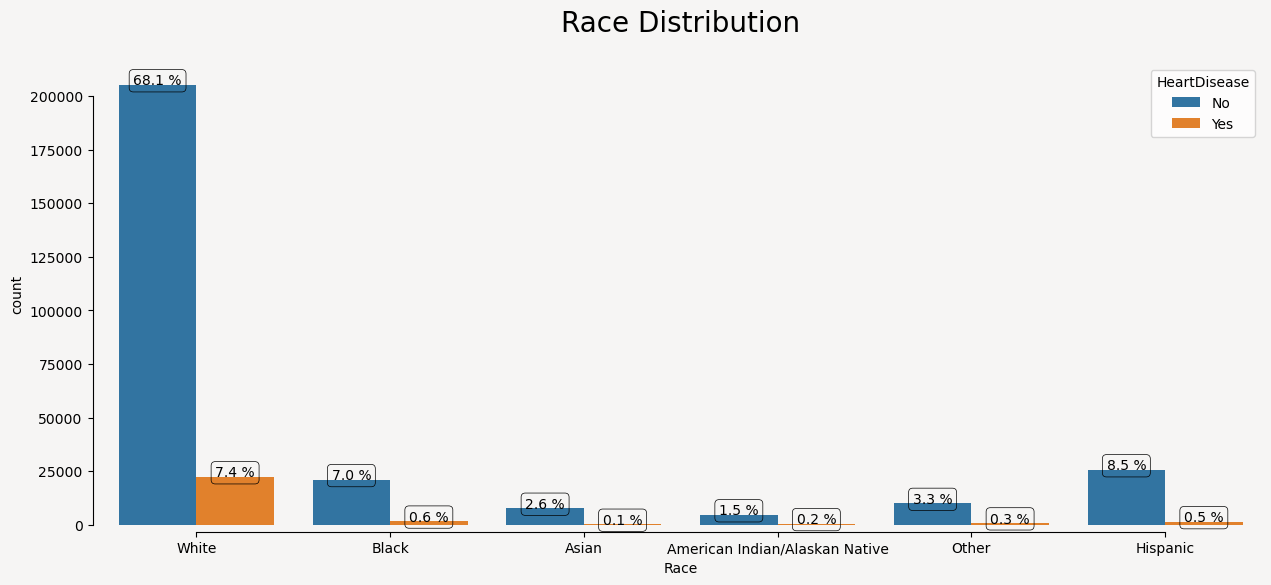

In [22]:
plt.figure(figsize=(15, 6),facecolor='#F6F5F4')
total = float(len(df))
ax = sns.countplot(x=df['Race'] , data= df, hue='HeartDisease')
ax.set_facecolor('#F6F5F4')

for p in ax.patches:
    
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,height + 3,'{:1.1f} %'.format((height/total)*100), ha="center",
           bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.5))

ax.set_title('Race Distribution', fontsize=20, y=1.05)
sns.despine(right=True)
sns.despine(offset=5, trim=True)

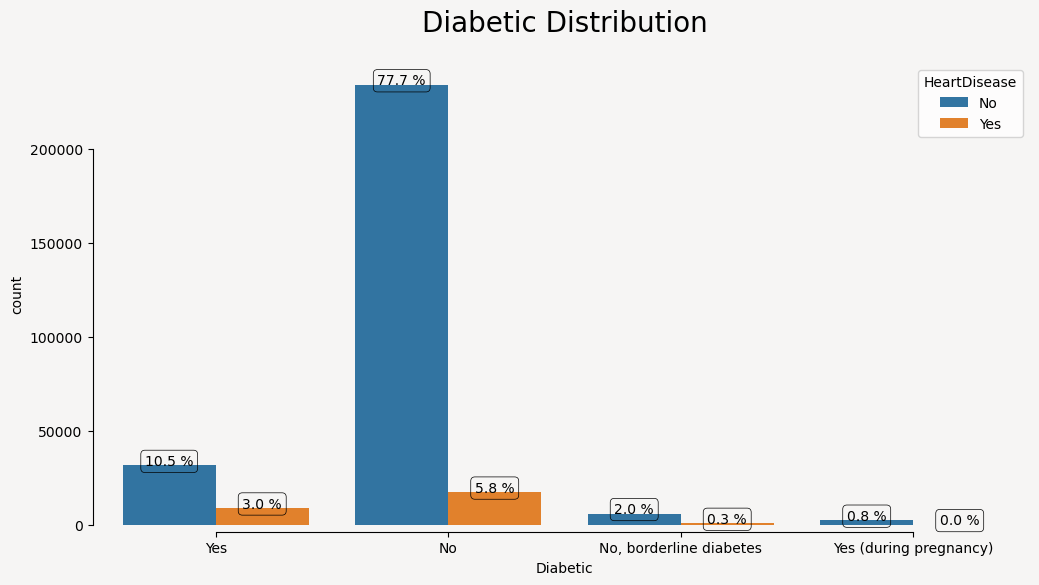

In [23]:
plt.figure(figsize=(12, 6),facecolor='#F6F5F4')
total = float(len(df))
ax = sns.countplot(x=df['Diabetic'], hue='HeartDisease', data= df)
ax.set_facecolor('#F6F5F4')

for p in ax.patches:
    
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,height + 3,'{:1.1f} %'.format((height/total)*100), ha="center",
           bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.5))

ax.set_title('Diabetic Distribution', fontsize=20, y=1.05)
sns.despine(right=True)
sns.despine(offset=5, trim=True)

### 2.3 Correlation Matrix:

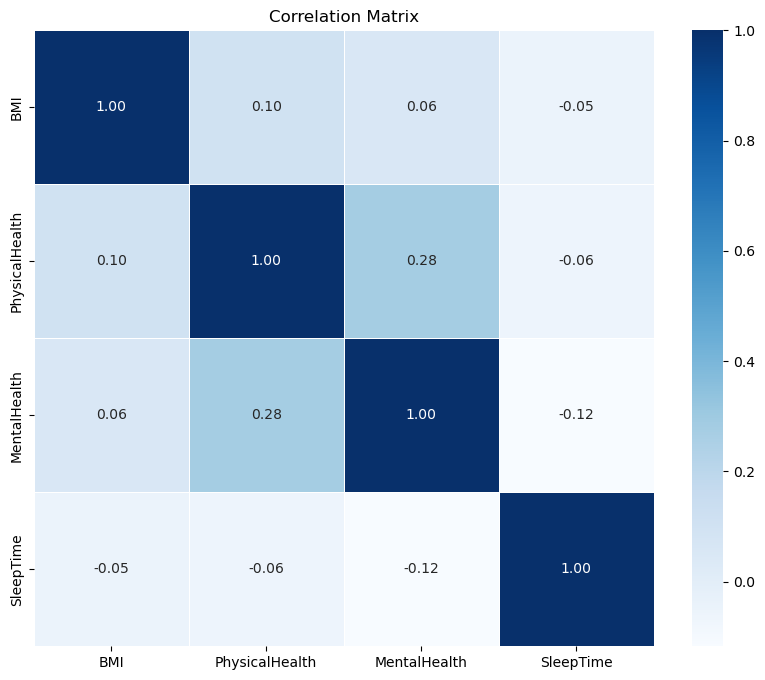

In [24]:
plt.figure(figsize=(10,8))
sns.heatmap(data=df[numerical_type].corr(), annot=True, cmap='Blues', linewidths=0.5, fmt='0.2f')
plt.title('Correlation Matrix')
plt.show()

## 3. Feature Engineering:

In [25]:
df_new = df.copy()

### 3.1 4.1 Encoding Categorical Variables:

In [26]:
df_new = df_new.replace({'No': 0, 'Yes': 1})

df_new["Sex"] = df_new["Sex"].replace({'Female': 0, 'Male': 1})

In [27]:
diabetic_mapping = {
    'No': 0,
    'No, borderline diabetes': 0,
    'Yes': 1,
    'Yes (during pregnancy)': 1
}

df_new['Diabetic'] = df_new['Diabetic'].replace(diabetic_mapping).astype(int)

In [28]:
race_mapping = {
    'American Indian/Alaskan Native': 0,
    'Asian': 1,
    'Black': 2,
    'Hispanic': 3,
    'Other': 4,
    'White': 5
}

df_new['Race'] = df_new['Race'].map(race_mapping).astype(int)

In [29]:
gen_health_mapping = {
    'Poor': 0,
    'Fair': 1,
    'Good': 2,
    'Very good': 3,
    'Excellent': 4
}

df_new['GenHealth'] = df_new['GenHealth'].replace(gen_health_mapping).astype(int)

In [30]:
age_mapping = {
    '18-24': 0,
    '25-29': 1,
    '30-34': 2,
    '35-39': 3,
    '40-44': 4,
    '45-49': 5,
    '50-54': 6,
    '55-59': 7,
    '60-64': 8,
    '65-69': 9,
    '70-74': 10,
    '75-79': 11,
    '80 or older': 12
}

df_new['AgeCategory'] = df_new['AgeCategory'].map(age_mapping).astype(int)

In [31]:
df_new.head(10)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,0,7,5,1,1,3,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,12,5,0,1,3,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,9,5,1,1,1,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,11,5,0,0,2,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,4,5,0,1,3,8.0,0,0,0
5,1,28.87,1,0,0,6.0,0.0,1,0,11,2,0,0,1,12.0,0,0,0
6,0,21.63,0,0,0,15.0,0.0,0,0,10,5,0,1,1,4.0,1,0,1
7,0,31.64,1,0,0,5.0,0.0,1,0,12,5,1,0,2,9.0,1,0,0
8,0,26.45,0,0,0,0.0,0.0,0,0,12,5,0,0,1,5.0,0,1,0
9,0,40.69,0,0,0,0.0,0.0,1,1,9,5,0,1,2,10.0,0,0,0


### 3.2 Scaling numerical features:

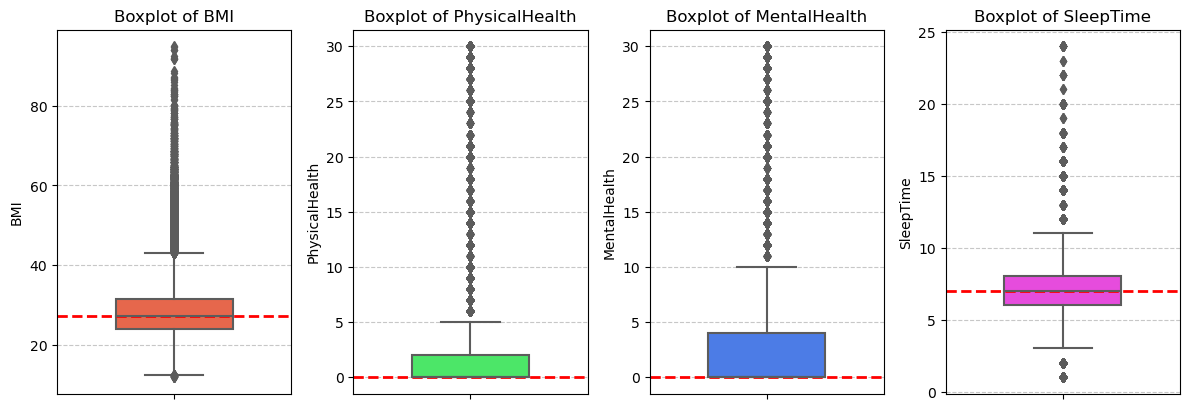

In [32]:
numerical_cols = ['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']

palette = sns.color_palette(mypal)

plt.figure(figsize=(12, 8))
for i, column in enumerate(numerical_cols, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(y=df_new[column], color=palette[i-1], width=0.5)
    plt.axhline(y=df_new[column].median(), color='red', linestyle='--', linewidth=2)
    plt.title(f'Boxplot of {column}', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()

plt.show()

In [33]:
features_to_scale_robust = ['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']


robust_scaler = RobustScaler()

df_new[features_to_scale_robust] = robust_scaler.fit_transform(df_new[features_to_scale_robust])

def count_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return ((series < lower_bound) | (series > upper_bound)).sum()

for feature in features_to_scale_robust:
    num_outliers = count_outliers(df_new[feature])
    print(f'Number of outliers in {feature}: {num_outliers}')

Number of outliers in BMI: 8913
Number of outliers in PhysicalHealth: 47136
Number of outliers in MentalHealth: 39713
Number of outliers in SleepTime: 4542


## 3.3 Pearson Correlation :

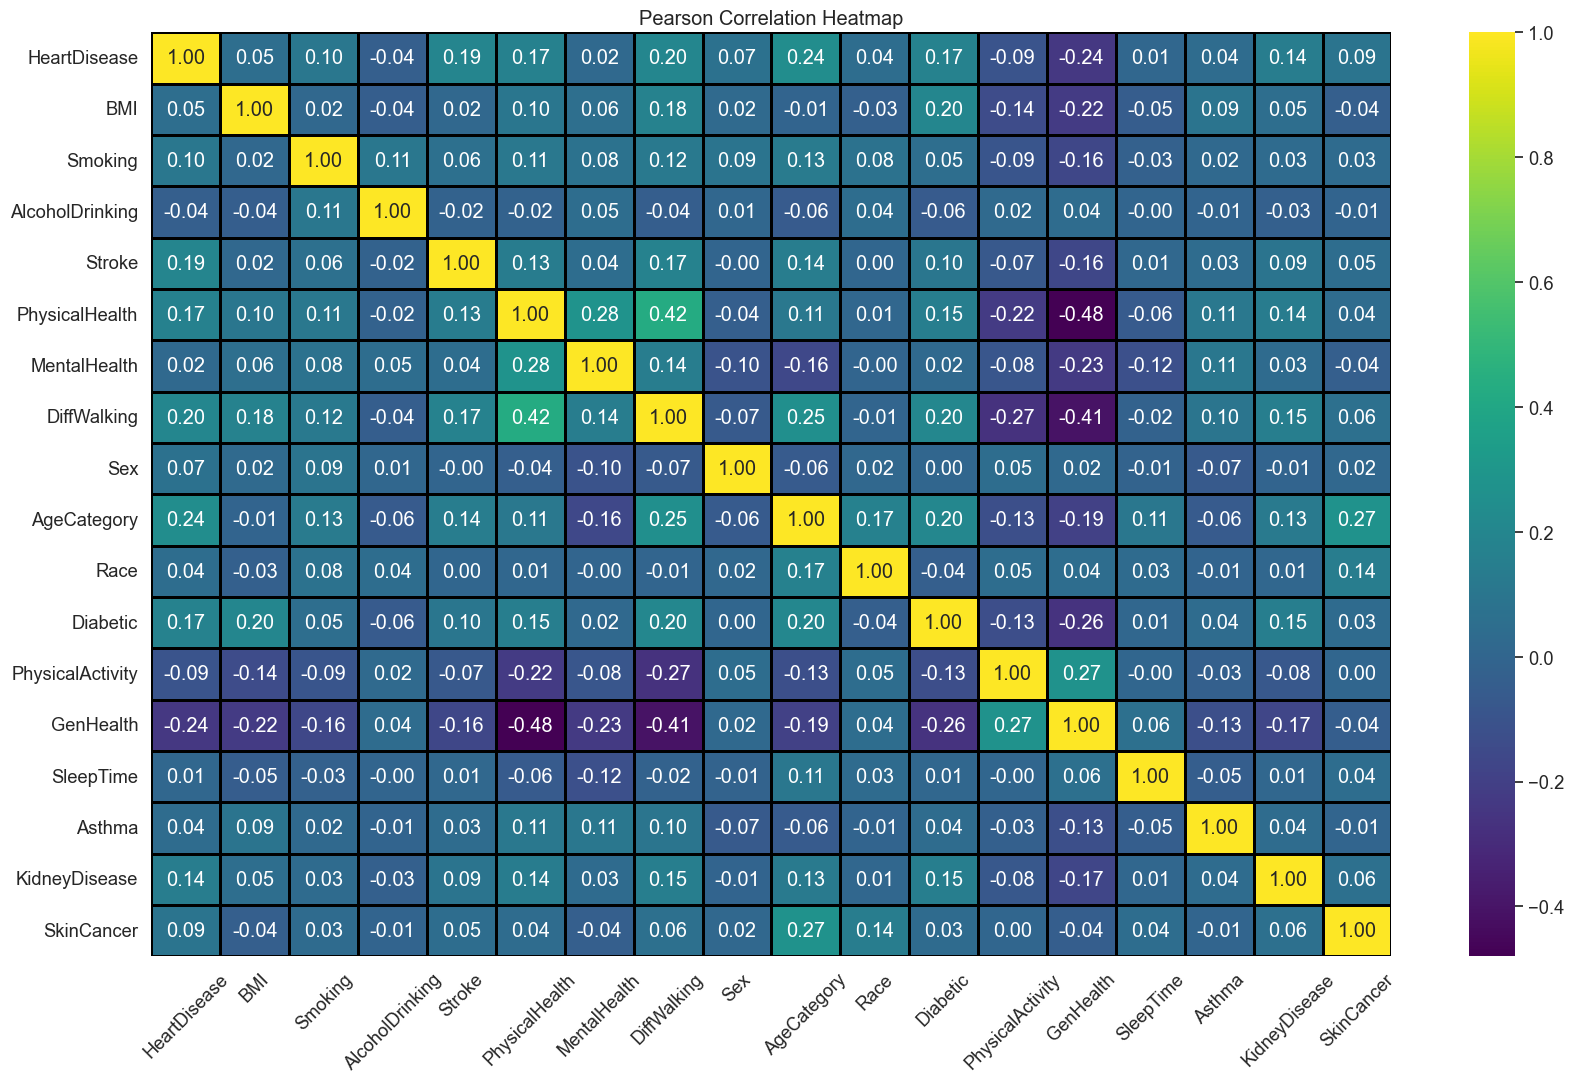

In [34]:
pearson_corr = df_new.corr(method='pearson')

# Plot heatmap
plt.figure(figsize=(20, 12))
sns.set(font_scale=1.2)
sns.heatmap(pearson_corr, annot=True, cmap='viridis', fmt=".2f", linewidths=1, linecolor='black')
plt.title('Pearson Correlation Heatmap')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

## 4. Data Preprocessing:

In [35]:
df_new_2 = df_new.copy()

In [36]:
X = df_new_2.drop(['HeartDisease'], axis=1)
y = df_new_2['HeartDisease']

In [37]:
scaler = MinMaxScaler(feature_range=(0, 1))
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((439129, 17), (109783, 17), (439129,), (109783,))

## 5. Modeling

In [39]:
param_dist_rf = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy'],
}

rf = RandomForestClassifier()

randomized_search_rf = RandomizedSearchCV(
    rf,
    param_distributions=param_dist_rf,
    n_iter=10,
    cv=5,
    scoring='accuracy',
    random_state=42,
    n_jobs=-1
)

randomized_search_rf.fit(X_train, y_train)

best_params_rf = randomized_search_rf.best_params_
print(f"Best Hyperparameters for Random Forest: {best_params_rf}")

best_rf_model = randomized_search_rf.best_estimator_

rf_predicted = best_rf_model.predict(X_test)

rf_acc_score = accuracy_score(y_test, rf_predicted)
rf_conf_matrix = confusion_matrix(y_test, rf_predicted)

print("\nConfusion Matrix for Random Forest:")
print(rf_conf_matrix)
print("\nAccuracy of Random Forest Classifier:", rf_acc_score * 100, '\n')
print("Classification Report for Random Forest:")
print(classification_report(y_test, rf_predicted))

Best Hyperparameters for Random Forest: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 30, 'criterion': 'gini', 'bootstrap': False}

Confusion Matrix for Random Forest:
[[51144  3759]
 [ 4006 50874]]

Accuracy of Random Forest Classifier: 92.92695590391955 

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93     54903
           1       0.93      0.93      0.93     54880

    accuracy                           0.93    109783
   macro avg       0.93      0.93      0.93    109783
weighted avg       0.93      0.93      0.93    109783



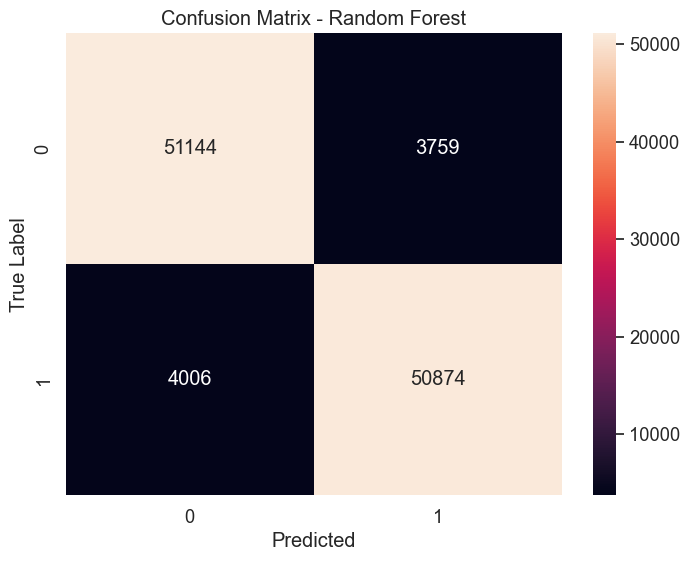

In [41]:
y_pred_prob_rf = best_rf_model.predict_proba(X_test)[:, 1]

cm = confusion_matrix(y_test, (y_pred_prob_rf > 0.5).astype(int))
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True Label')  
plt.title('Confusion Matrix - Random Forest')
plt.show()

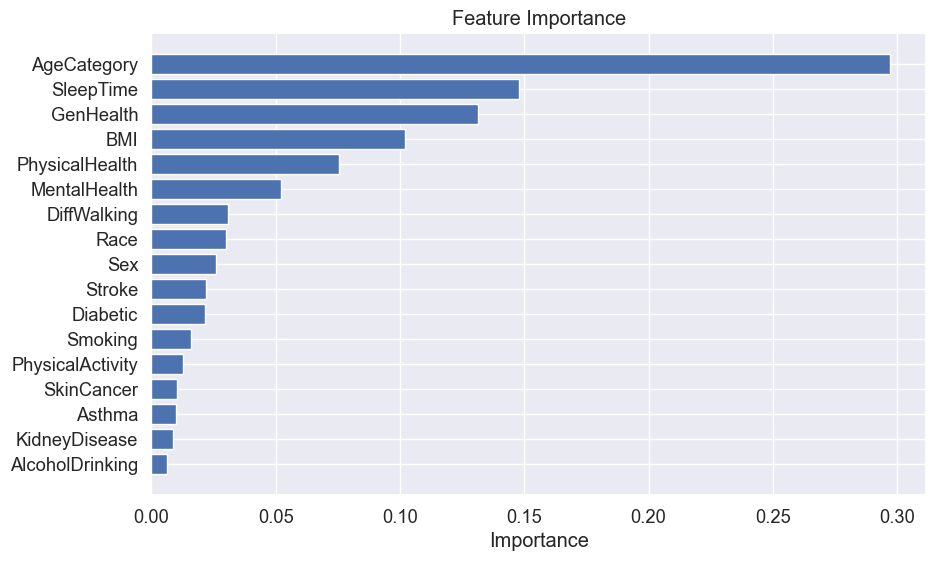

In [45]:
feature_importance_values = best_rf_model.feature_importances_


feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importance_values})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  
plt.show()

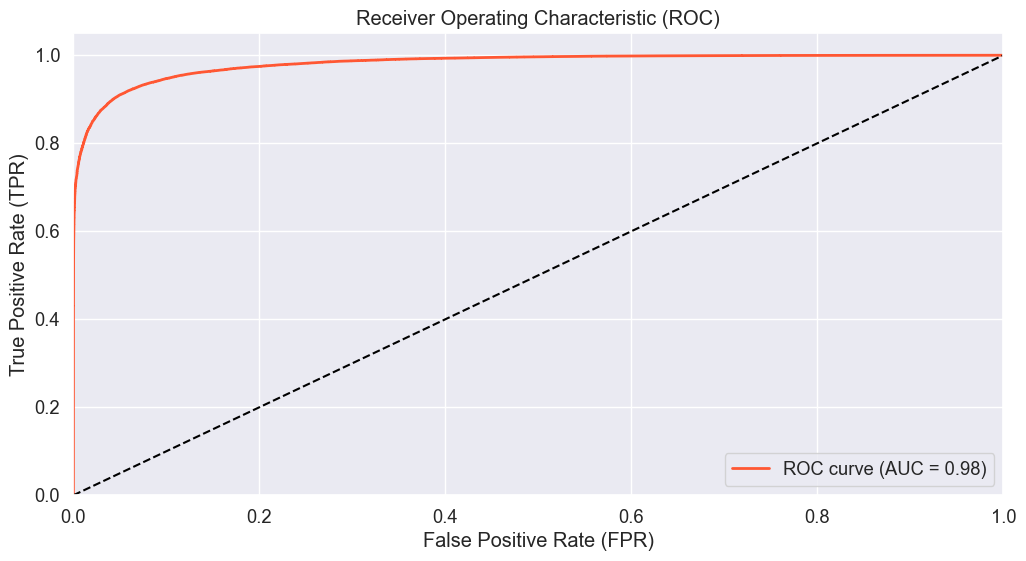

Area Under Curve (AUC): 0.9811892486412161


In [46]:
y_pred_prob = best_rf_model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

roc_auc = auc(fpr, tpr)

plt.figure(figsize=(12, 6))
plt.plot(fpr, tpr, color='#FF5733', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

print("Area Under Curve (AUC):", roc_auc)

Berikut kesimpulan dari analisis fitur untuk penyakit jantung:

1. Usia (AgeCategory): Menunjukkan bahwa usia adalah faktor kunci dalam menentukan risiko atau indikator penyakit jantung. Semakin tua seseorang, semakin besar kemungkinan mengalami masalah jantung.
2. Waktu Tidur (SleepTime): Pola tidur yang baik atau buruk dapat mempengaruhi kesehatan jantung seseorang. Kurang tidur atau kualitas tidur yang buruk dapat meningkatkan risiko penyakit jantung.
3. Kesehatan Umum (GenHealth): Kondisi kesehatan umum, termasuk faktor genetik, bisa menjadi prediktor penting dalam mengidentifikasi potensi risiko penyakit jantung.
4. Indeks Massa Tubuh (BMI): BMI yang tinggi sering dikaitkan dengan risiko penyakit jantung yang lebih tinggi, karena obesitas sering menjadi faktor risiko utama.
5. Kesehatan Fisik (PhysicalHealth): Faktor-faktor seperti kondisi kesehatan fisik dan kebugaran juga dapat memberikan indikasi risiko penyakit jantung.
6. Kesehatan Mental (MentalHealth): Kesehatan mental yang baik juga dapat berkontribusi pada kesehatan jantung secara keseluruhan.
7. Kesulitan Berjalan (DiffWalking): Kesulitan atau gangguan dalam berjalan dapat menjadi tanda awal masalah jantung.
8. Faktor Lain: Ras, jenis kelamin, dan riwayat medis lainnya seperti stroke, diabetes, asma, dan penyakit ginjal juga dapat memberikan informasi tambahan tentang potensi risiko penyakit jantung.

Memahami pentingnya fitur-fitur ini dalam konteks penyakit jantung dapat membantu mengembangkan model prediktif yang lebih akurat untuk mengidentifikasi indikator atau faktor risiko penyakit jantung pada individu tertentu.